In [7]:
import pandas as pd

# Load your file (after uploading in the left sidebar in Colab)
df = pd.read_csv('/content/bank_transactions.csv')

# Check the first few rows
df.head()


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [8]:

df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%d/%m/%y')


snapshot_date = df['TransactionDate'].max() + pd.Timedelta(days=1)


print("Snapshot Date:", snapshot_date)
df['TransactionDate'].head()

Snapshot Date: 2016-10-22 00:00:00


,TransactionDate
0,2016-08-02
1,2016-08-02
2,2016-08-02
3,2016-08-02
4,2016-08-02


In [10]:
# recency days since last transations
recency_df = df.groupby('CustomerID')['TransactionDate'].max().reset_index()
recency_df['Recency'] = (snapshot_date - recency_df['TransactionDate']).dt.days

# fre total tensactions per customer
frequency_df = df.groupby('CustomerID')['TransactionID'].count().reset_index()
frequency_df.columns = ['CustomerID', 'Frequency']

# Monetary total amount spent by customer
monetary_df = df.groupby('CustomerID')['TransactionAmount (INR)'].sum().reset_index()
monetary_df.columns = ['CustomerID', 'Monetary']

# Merge all RFM values
rfm = recency_df.merge(frequency_df, on='CustomerID').merge(monetary_df, on='CustomerID')
rfm = rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary']]

# Show top few results
rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,C1010011,26,2,5106.0
1,C1010012,69,1,1499.0
2,C1010014,76,2,1455.0
3,C1010018,37,1,30.0
4,C1010024,65,1,5000.0


Visulaize RFM Distribution **bold text**

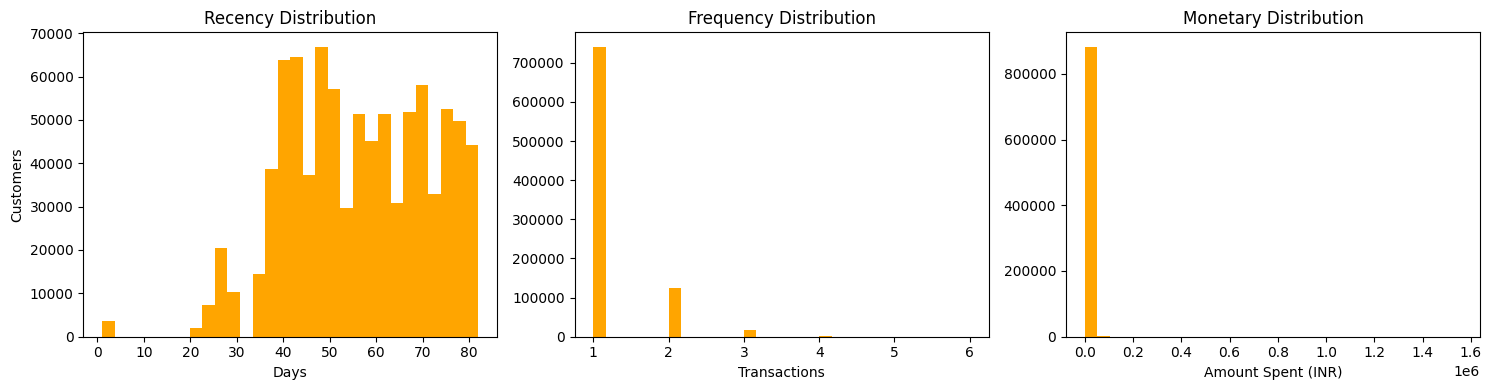

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 4))

# recency distribution
plt.subplot(1, 3, 1)
plt.hist(rfm['Recency'], bins=30, color='orange')
plt.title('Recency Distribution')
plt.xlabel('Days')
plt.ylabel('Customers')

#frequency distribution
plt.subplot(1, 3, 2)
plt.hist(rfm['Frequency'], bins=30, color='orange')
plt.title('Frequency Distribution')
plt.xlabel('Transactions')

plt.subplot(1, 3, 3)
plt.hist(rfm['Monetary'], bins=30, color='orange')
plt.title('Monetary Distribution')
plt.xlabel('Amount Spent (INR)')

plt.tight_layout()
plt.show()


Handle Skewness (log transformation)

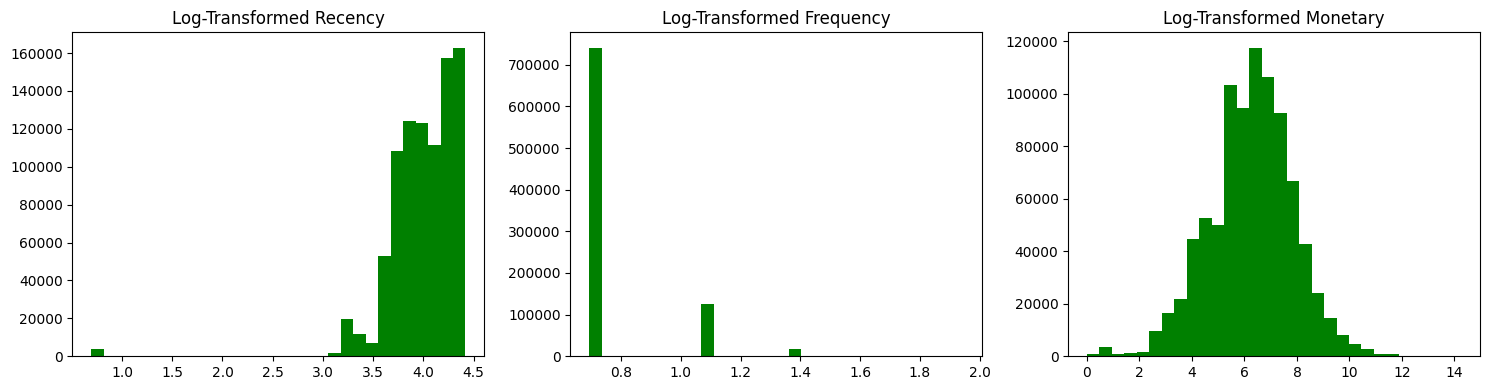

In [12]:
import numpy as np

# Apply log(1 + x) to avoid issues with zeros
rfm_log = rfm.copy()
rfm_log[['Recency', 'Frequency', 'Monetary']] = np.log1p(rfm_log[['Recency', 'Frequency', 'Monetary']])

# plot values performed
plt.figure(figsize=(15, 4))

#log recency
plt.subplot(1, 3, 1)
plt.hist(rfm_log['Recency'], bins=30, color='green')
plt.title('Log-Transformed Recency')

#logfrequency
plt.subplot(1, 3, 2)
plt.hist(rfm_log['Frequency'], bins=30, color='green')
plt.title('Log-Transformed Frequency')

#log monetary
plt.subplot(1, 3, 3)
plt.hist(rfm_log['Monetary'], bins=30, color='green')
plt.title('Log-Transformed Monetary')

plt.tight_layout()
plt.show()
